In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics



In [0]:
def plot_gallery(images):
  plt.figure(figsize=(7.2,7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
  plt.show()

[X, y, name]=np.load("TP1.npy",allow_pickle=True )


**Sachant que X représente les features, y les labels et name le nom des classes, déterminer la
taille des images, le nombre d’images et le nombre de classes.**





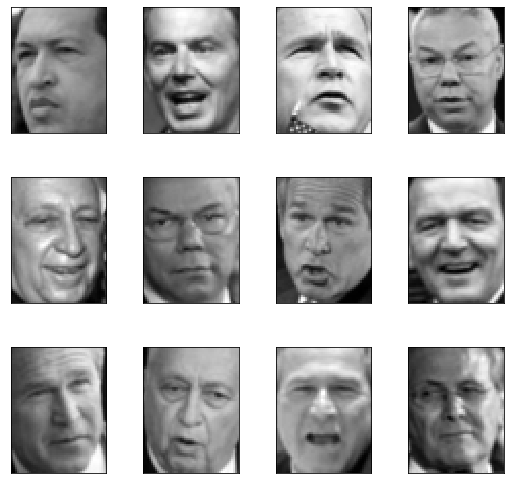

Hugo Chavez
Tony Blair
George W Bush
Colin Powell
Ariel Sharon
Colin Powell
George W Bush
Gerhard Schroeder
George W Bush
Ariel Sharon
George W Bush
Donald Rumsfeld


In [0]:
plot_gallery(X)
for i in range(0,12):
  temp=y[i]
  print(name[temp])

Il y a 12 images, 7 classes et une taille de image de 62*47 pixels

Text(0.5, 1.0, 'nombre d exemples')

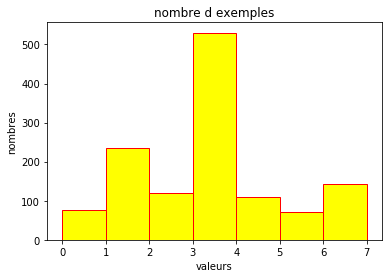

In [0]:
plt.hist(y, range = (0, 7), bins = 7, color = 'yellow',
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('nombre d exemples')

In [8]:
for i in range(0,7):
  print (str(i)+" : "+name[i])

0 : Ariel Sharon
1 : Colin Powell
2 : Donald Rumsfeld
3 : George W Bush
4 : Gerhard Schroeder
5 : Hugo Chavez
6 : Tony Blair


les classes ne sont pas equiprobables avec Bush qui revient beaucoup plus de fois que toutes les autres personnalités

**PARTITIONNAGE**

In [0]:
#il y a 25% des donnees en test et 75% en test :


In [9]:
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.25,random_state=42)
print(len(xTrain))
print(len(xTest))
  

966
322


**Pretraitement des donnees**

In [10]:

xTrain=np.reshape(xTrain,(xTrain.shape[0],xTrain.shape[1]*xTrain.shape[2]))
print(np.shape(xTrain))
xTest=np.reshape(xTest,(xTest.shape[0],xTest.shape[1]*xTest.shape[2]))
print(np.shape(xTest))


(966, 2914)
(322, 2914)


In [0]:

X_scaled_train = preprocessing.StandardScaler().fit_transform(xTrain)
X_scaled_Test=preprocessing.StandardScaler().fit_transform(xTest)


La fonction Standard Scaler :
Standardization of datasets is a common requirement for many machine learning estimators 

 **all features are centered around zero and have variance in the same order.**
 

**CLASSIFICATION PAR LES KPPV**



In [18]:
classifier=neighbors.KNeighborsClassifier(n_neighbors=1,p=2)
#p=2 pour la distance euclidienne
classifier.fit(xTrain,yTrain)
yPred=classifier.predict(xTest)
C1=metrics.confusion_matrix(yTest,yPred)
print(C1)
print("taux de reco", np.sum(np.diag(C1))/np.sum(C1)*100)
#plus la matrice de confusion est diagonale, plus le classifieur est efficace, c'est un outil de mesure



[[  5   3   1   2   1   1   0]
 [  3  28   8  13   2   2   4]
 [  3   3  14   7   0   0   0]
 [  2   8   9 101   6   9  11]
 [  0   4   0   6   7   1   7]
 [  0   1   0   3   3   8   0]
 [  1   3   1  14   3   0  14]]
taux de reco 54.96894409937888


In [19]:
classifier=neighbors.KNeighborsClassifier(n_neighbors=17,p=2)
classifier.fit(xTrain,yTrain)
yPred=classifier.predict(xTest)
C2=metrics.confusion_matrix(yTest,yPred)
print(C2)
print("taux de reco", np.sum(np.diag(C2))/np.sum(C2)*100)

[[  2   4   1   6   0   0   0]
 [  1  39   2  18   0   0   0]
 [  0   6  10  11   0   0   0]
 [  0   8   1 135   0   1   1]
 [  2   2   3  15   1   1   1]
 [  0   3   0   8   1   3   0]
 [  0   8   3  22   0   0   3]]
taux de reco 59.93788819875776


In [23]:
classifier=neighbors.KNeighborsClassifier(n_neighbors=10,p=1)
classifier.fit(xTrain,yTrain)
yPred=classifier.predict(xTest)
C3=metrics.confusion_matrix(yTest,yPred)
print(C3)
print("taux de reco", np.sum(np.diag(C3))/np.sum(C3)*100)

[[  2   7   2   2   0   0   0]
 [  1  43   1  14   0   1   0]
 [  2   7  10   8   0   0   0]
 [  1   5   2 134   1   1   2]
 [  0   4   4  11   5   0   1]
 [  0   2   0   8   1   4   0]
 [  0   6   0  19   1   0  10]]
taux de reco 64.59627329192547


In [0]:
def variationkppv2(n):
  classifier=neighbors.KNeighborsClassifier(n_neighbors=n,p=2)
  classifier.fit(xTrain,yTrain)
  yPred=classifier.predict(xTest)
  C2=metrics.confusion_matrix(yTest,yPred)
  return np.sum(np.diag(C2))/np.sum(C2)*100
def variationkppv1(n):
  classifier=neighbors.KNeighborsClassifier(n_neighbors=n,p=1)
  classifier.fit(xTrain,yTrain)
  yPred=classifier.predict(xTest)
  C2=metrics.confusion_matrix(yTest,yPred)
  return np.sum(np.diag(C2))/np.sum(C2)*100
tab=[0]*22
tab2=[0]*22
for i in range(1,22):
  tab[i]=variationkppv2(i)
  tab2[i]=variationkppv1(i)


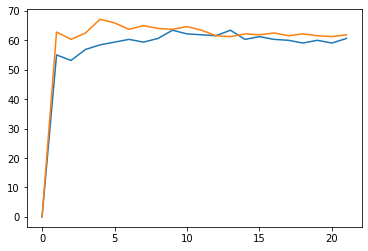

In [40]:

plt.plot(tab)
plt.plot(tab2)
plt.show()